# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
# I-  ===========================  importacion de modulos/librerias-.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess as sp
from sklearn.datasets import load_boston  # @ cargar el DS-.
import seaborn as sns
from matplotlib import gridspec
import scipy.stats as st

In [2]:
# @ AA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,\
    mean_absolute_error,\
    mean_squared_error,\
    explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# transform DS to PandasDataFrame-.
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# print(f'Tamano del DF ANTES de agregar la variable de interes'
#      f'{df.shape}')
df['target'] = boston.target  # agregamos la variable MEDV == target del DF.-
# print(f'Tamano del DF LUEGO de agregar la variable de interes'
#      f'{df.shape}')

# print(f'{nl}{type(boston)}{nl}')  # Cont. Obj. exposing keys as attributes.
# FUNDAMENTAL MAS IMPORTANTE ==> llaves del diccionario (valores==>values())-.
#print(f'{nl}{boston.keys()}{nl}')
# print(f'{nl}{boston}{nl}')  # llaves y valores del diccionario-.

# que contiene cada llave del diccionario?-.
print('{0}{1} ******** Descripcion del dataset ******** {2}{3}'.
      format('\n', '\t', boston['DESCR'], '\n')) # descripcion del dataset-.
# PDF/matriz con los datos de entrada (atributos)-.
# print(boston['data'])
# vector con los valores de precio (-media-) ||| np array (.size == 506)-.
# print(boston['target'])
# nombres de los atrib. p c/column de 'data'  ||| np array (.size == 13)-.-.
# print(boston['feature_names'].size)


	 ******** Descripcion del dataset ******** .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value proper

In [6]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [7]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

Descripcion/caracteristicas del DataSet (DS):
Cada registro/fila del DS corresponde a una *ciudad o suburbio?* de
Boston. Inicialmente el DS fue hecho por el SMSA (Boston Standard
Metropolitan Statistical en 1970). Los creadores del DS son
Harrison, D. and Rubinfeld, D.L.; este DS es una copia del  UCI ML
housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
y fue tomado del StatLib library el cual es mantenido por la Universidad de
Carnie Mellon-.

IMPORTANTE: el DS, tal como esta,
presenta problemas ETICOS (para mi vinculados a DISCRIMINACION RACIAL Y 
SOCIAL en su lugar deberia trabajarse con el DS original).

====================================================================
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
====================================================================

* Numero de casos reportados (registros): 506 (registro/fila/
  ciudad/suburbio)-.
* Numero de atributos/variables predictivas por registro: 13 (trece)
  -NUMERICAS/CATEGORICAS-. El valor medio (atributo/variable 14) es el
  blanco u objetivo -notar que la key que corresponde a esta variable,
  "target", es diferente al key del DS "MEDV"-.
************************************************************************

# Análisis adicional:

In [8]:
# adicional, visualizamos el DS @ chequear si existen valores nulos,
# Tipos de Datos (TdD), cantidad de datos, balanceo de datos, etc.

#new_print('Columnas del DF', True)
print(df.columns) # listo las columnas-.
#new_print(None, False, True)

#new_print('Estadistica de las variables del DF', True)
print(df.describe().T) # estadistica descriptiva del DS-.
#new_print(None, False, True)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')
         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.

In [9]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')


In [10]:
#new_print('Datos duplicados en el DF', True)
print(df.duplicated()) # chequeo si existen datos DUPLICADOS-.
if df.duplicated().sum() == 0:
    print('No existen datos repetidos')
else:
    print('Cantidad de datos repetidos {0}'.
          format(df.duplicated().sum()))
#new_print(None, False, True)


0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool
No existen datos repetidos


In [11]:
#new_print('Datos nulos en el DF', True)
print(df.isnull().sum()) # chequeo explicito si exi. datos nulos-.
#new_print(None, False, True)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [12]:
#new_print('NaNs en el DF', True)
print(df.isna().sum()) # chequeo explicito si exi. NaNs-.
#new_print(None, False, True)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [13]:
#new_print('NaNs en el DF', True)
print(df.info())
#new_print(None, False, True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [14]:
#new_print('Tipos de Datos de las variables del DF', True)
print(df.dtypes)
#new_print(None, False, True)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object


In [15]:
#a partir de la observacion de los TdD de las variables del DS,
# identifico dos variables que son "categoricas",
# las imprimo para chequear-.
#new_print('Check vars que pueden ser categoricas en el DF', True)
print(df.loc[:,['RAD', 'CHAS']]) # idem print(df[df['RAD', 'CHAS']])
print(df.loc[:,'RAD'].unique())
print(df.loc[:,'CHAS'].unique())
#new_print(None, False, True)

     RAD  CHAS
0    1.0   0.0
1    2.0   0.0
2    2.0   0.0
3    3.0   0.0
4    3.0   0.0
..   ...   ...
501  1.0   0.0
502  1.0   0.0
503  1.0   0.0
504  1.0   0.0
505  1.0   0.0

[506 rows x 2 columns]
[ 1.  2.  3.  5.  4.  8.  6.  7. 24.]
[0. 1.]


In [16]:
# claramente son variables categoricas:
# RAD: variable categorica que toma los valores: 1, 2, 3, 4, 5, 
# 6, 7, 8, 24. No entiendo que significa cada indice ni su
# implicancia-.
# CHAS: variable categorica binaria. Toma los valores: 0 y 1-.

In [17]:
# convierto ambas variables a enteras-.
cols_to_convert = {
    'RAD': np.int64,
    'CHAS': np.int64
}
df = df.astype(cols_to_convert)


#new_print('Tipos de Datos de las variables del DF '
          #'MODIFICADAS', True)
print(df.dtypes)
print(df.loc[:,['RAD', 'CHAS']])
print('Valores unicos de la variable {0}{1}{2}'.
      format('RAD', '\n', df.loc[:,'RAD'].unique()))
print('Valores unicos de la variable {0}{1}{2}'.
      format('CHAS', '\n', df.loc[:,'CHAS'].unique()))
print('Total de cada valor unico de la variable {0}{1}{2}'.
      format('RAD', '\n', df.loc[:,'RAD'].value_counts()))
print('Total de cada valor unico de la variable {0}{1}{2}'.
      format('CHAS', '\n', df.loc[:,'CHAS'].value_counts()))
#new_print(None, False, True)

# print(df.corr()) # correlation matrix-.


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object
     RAD  CHAS
0      1     0
1      2     0
2      2     0
3      3     0
4      3     0
..   ...   ...
501    1     0
502    1     0
503    1     0
504    1     0
505    1     0

[506 rows x 2 columns]
Valores unicos de la variable RAD
[ 1  2  3  5  4  8  6  7 24]
Valores unicos de la variable CHAS
[0 1]
Total de cada valor unico de la variable RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64
Total de cada valor unico de la variable CHAS
0    471
1     35
Name: CHAS, dtype: int64


In [18]:
# Examinamos con mayor detalle los % de datos de cada variable
# correspondientes a OUTLIERS-.
def get_out(ps_val, tot_vals):
    iqr = abs(ps_val.quantile(0.25, interpolation='nearest')-
              ps_val.quantile(0.75, interpolation='nearest'))
    llp = ps_val.quantile(0.25) - (1.5*iqr) # lower_limit_point-.
    ulp = ps_val.quantile(0.75) + (1.5*iqr) # upper_limit_point-.
    # check if there is/are outlier/s-.
    if ps_val.min() > llp and ps_val.max() < ulp:
        por_out= 0.0
    else:
        ps_val_col = ps_val[(ps_val < llp) | (ps_val > ulp)]
        por_out= np.shape(ps_val_col)[0]*100/tot_vals
    return por_out

for ps_name, ps_val in df.items():
    por_out = get_out(ps_val, np.shape(df)[0])
    print('Variable {0:<20} {1:<20} {2:>5.2f}{3:>2}'.
          format(ps_name, 'OUTLIERS', por_out, '%'))
    # val = ps_val.apply(get_out, convert_dtype=False)

Variable CRIM                 OUTLIERS             13.04 %
Variable ZN                   OUTLIERS             13.44 %
Variable INDUS                OUTLIERS              0.00 %
Variable CHAS                 OUTLIERS              6.92 %
Variable NOX                  OUTLIERS              0.00 %
Variable RM                   OUTLIERS              5.93 %
Variable AGE                  OUTLIERS              0.00 %
Variable DIS                  OUTLIERS              0.99 %
Variable RAD                  OUTLIERS              0.00 %
Variable TAX                  OUTLIERS              0.00 %
Variable PTRATIO              OUTLIERS              2.96 %
Variable B                    OUTLIERS             15.02 %
Variable LSTAT                OUTLIERS              1.19 %
Variable target               OUTLIERS              7.71 %


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

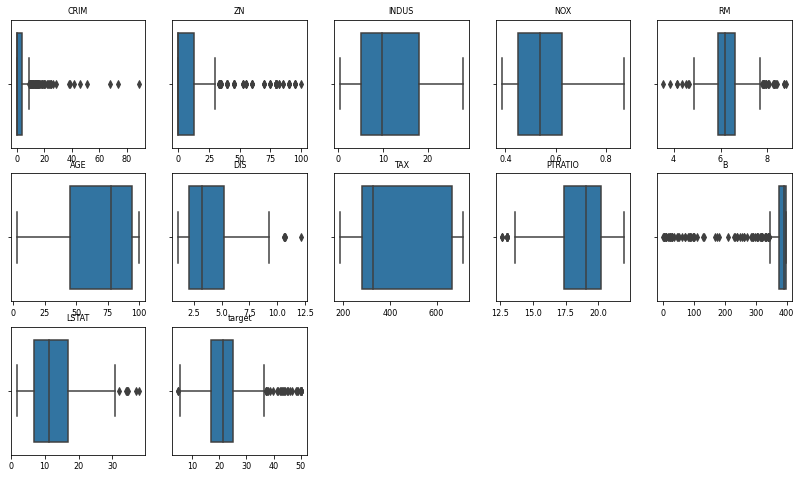

In [19]:
 #Adenda 1: visualizamos los OUTLIERS reportados en el punto
#            anterior-.
plt.rc('font', size=8)       # set the axes title font size-.
plt.rc('axes', titlesize=8)  # set the axes labels font size-.
plt.rc('axes', labelsize=8)  # set the font size for x tick labels-.
plt.rc('xtick', labelsize=8) # set the font size for y tick labels-.
plt.rc('ytick', labelsize=8) # set the legend font size-.
plt.rc('legend', fontsize=8) # set the font size of the figure title-.
plt.rc('figure', titlesize=8)

if True: # @ comentado 30052022 --FIG_1--
    cat_cols=['RAD', 'CHAS']
    nrows= 3; ncols=5
    plt.figure(figsize=(14,8))
    df_nums_cols= df.drop(cat_cols, axis=1)
    for idx, col in enumerate(df_nums_cols, start=1):
        plt.subplot(nrows, ncols, idx)
        ax= sns.boxplot(data=df, x=col)
        plt.title(col)
        ax.set_xlabel(None)
#    plt.show()

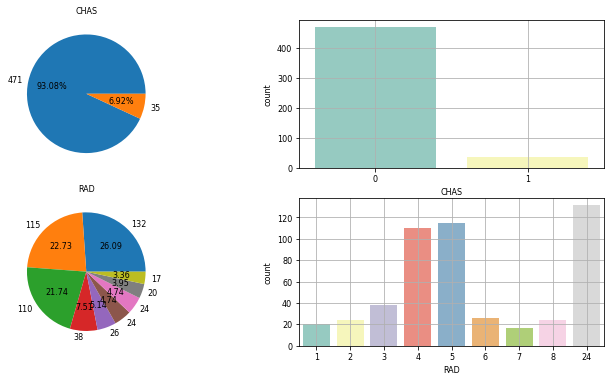

In [20]:
# Adenda 2: visualizacion de las variables categoricas del DS usando
#           graficos de barras y tortas-.
# luego me di cuenta que simplemente con '%.2f%%' se solucionaba
# lo dejo por las dudas (extraida de stackoverflow)-.
if False:
    def autopct_format(values):
        def my_format(pct):
            total = np.sum(values)
            val = int(np.round(pct*total/100.0))
            return '{:.2f}%\n({v:d})'.format(pct, v=val)
        return my_format

if True: # @ comentado 30052022 #--FIG_2--
    nrows= 2; ncols= 2
    figure1, axes= plt.subplots(nrows, ncols, figsize=(12,6)) 
    total= len(df['CHAS'])
    axes[0,0].pie(df['CHAS'].value_counts(),
                  labels= df['CHAS'].value_counts(),
                  autopct='%.2f%%'
                  )
    sns.countplot(x='CHAS',
                  data=df,
                  palette='Set3',
                  ax= axes[0,1]
                  )
    axes[1,0].pie(df['RAD'].value_counts(),
                  labels= df['RAD'].value_counts(),
                  autopct='%.2f'
                  )
    sns.countplot(x='RAD',
                  data=df,
                  palette='Set3',
                  ax= axes[1,1]
                  )
    axes[0,0].set_title('CHAS')
    axes[1,0].set_title('RAD')
    axes[0,1].grid()
    axes[1,1].grid()
# plt.show()

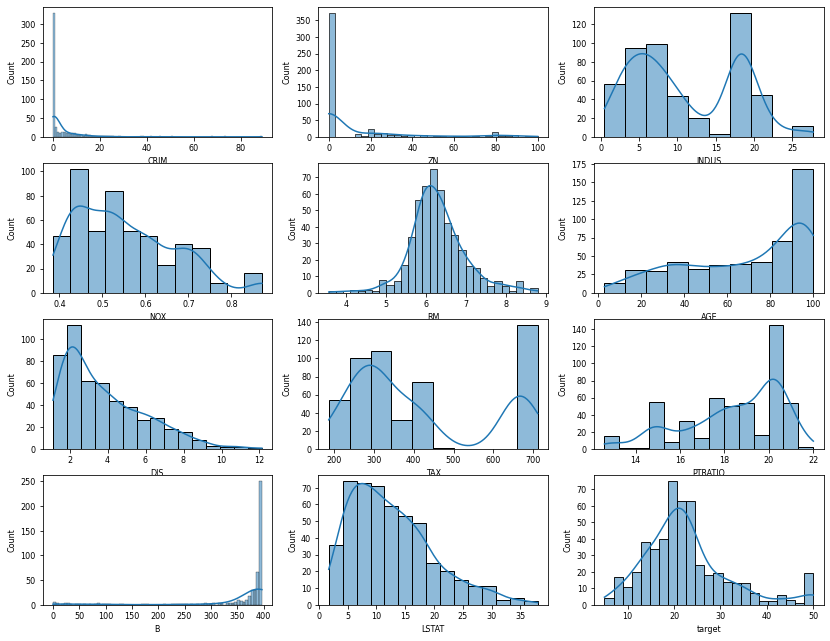

In [21]:
# Adenda 3: analizo la distribucion de los atributos y de la variable
# target u objetivo-.
'''
# only to practice lambda function -the code was removed-.
lista = ['RAD', 'CHAS']
target_columns = list(filter(lambda x: x not in
                             lista,
                             df.columns)
                      )
'''
if True: # @ comentado 30052022  #--FIG_3--
    target_columns= list(df[df_nums_cols.columns].columns) # pythonic form-.
    nsfigs= len(target_columns) # number of subfigs-.
    nc= 3
    nr= int(np.ceil(nsfigs/nc))
    # @ gridspec see Arranging multiple Axes in a Figure Matplotlib doc.-.
    gs= gridspec.GridSpec(nr, nc) 
    fig= plt.figure(figsize=(14,11))
    for idx, col in enumerate(target_columns, start=0):
        ax= fig.add_subplot(gs[idx])
        sns.histplot(x= col,
                     data= df, # the same result that with df_nums_cols-.
                     kde= True,
                     ax= ax)

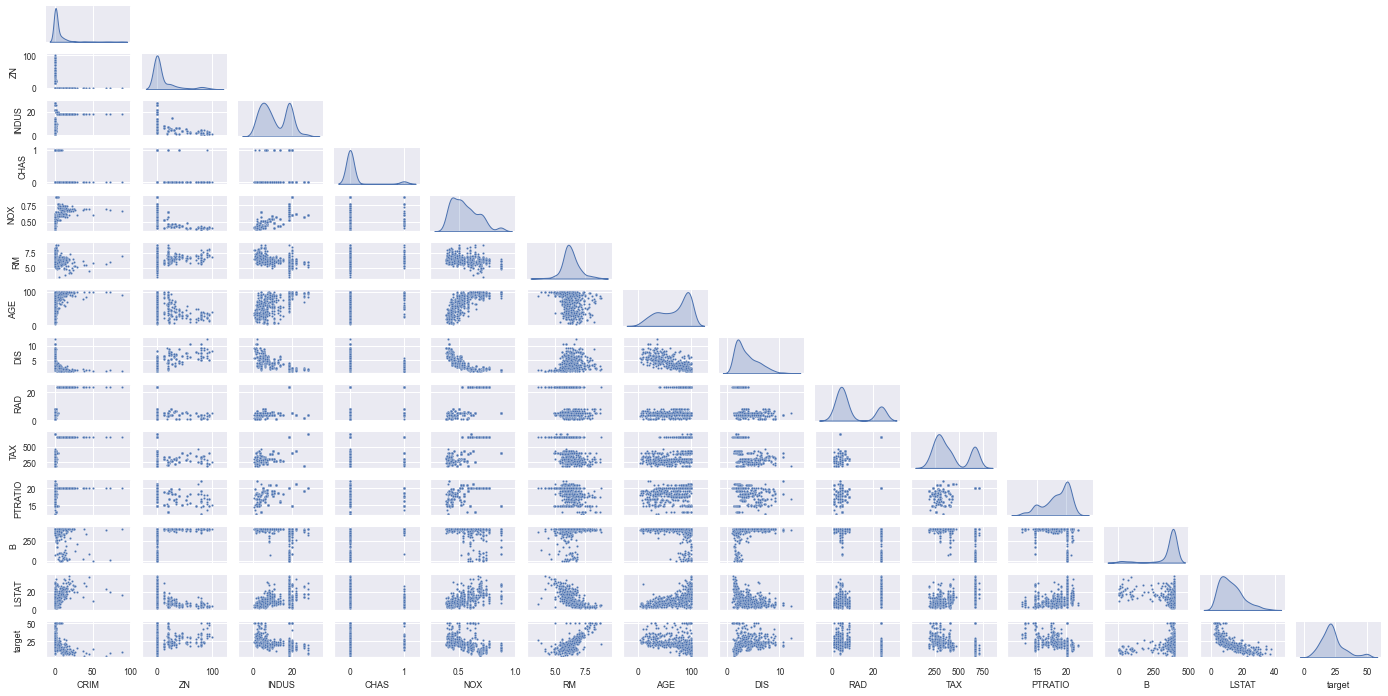

In [22]:
# Adenda 4: grafico de correlacion de las diferentes variables
# (numericas y categoricas)-.
if True: # @ comentado 30052022 --FIG_4--
#    fig= plt.figure(figsize=(100,100))
    sns.plotting_context(font_scale=0.75)
    sns.set(font_scale = 0.75)
    sns.color_palette("rocket", as_cmap=True)
    
    fig= sns.pairplot(df,
                      diag_kind= 'kde',
                      height= 0.7,
                      aspect= 2.0,
                      corner= True,
                      palette='Dark2',
                      #                  hue='CHAS',
                      #                  kind= 'reg',
                      markers='o',
                      diag_kws= dict(shade=True),
                      plot_kws={'s': 5}
                      )

**2.1 Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo**

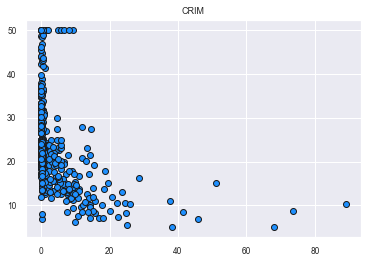

In [23]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

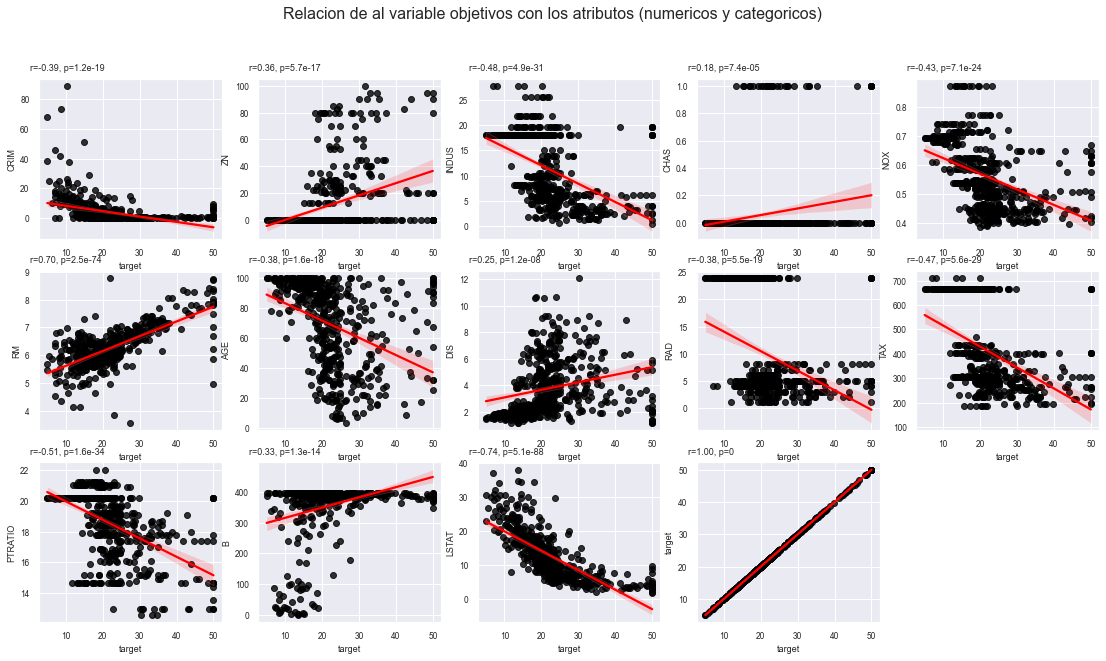

In [24]:
#      relacion con la variable objetivo.
if True: # @ comentado 30052022  --FIG_5--
    target_columns= list(df.columns) # pythonic form-.
    nsfigs= len(target_columns) # number of subfigs-.
    nc= 5
    nr= int(np.ceil(nsfigs/nc))
    # print(nr)
    # @ gridspec see Arranging multiple Axes in a Figure Matplotlib doc.-.
    gs= gridspec.GridSpec(nr, nc) 
    fig= plt.figure(figsize=(19,10))
    for idx, col in enumerate(target_columns, start=0):
        ax= fig.add_subplot(gs[idx])
        r, p = st.pearsonr(df['target'],df[col])
        sns.regplot(data= df,
                    x= 'target',
                    y= col,
                    fit_reg= True,
                    scatter_kws={"color": "black"},
                    line_kws={"color": "red"},
                    ax= ax
                    )
        ax.text(-.05, 1.05, 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)
        # ax.set_title('{0} en funcion de {1}'.format('target', col)))
        plt.suptitle('Relacion de al variable objetivos con los atributos'+
                     ' (numericos y categoricos)', fontsize=16)


**2.2 Estudie las gráficas, identificando a ojo los atributos que a su criterio sean los más informativos para la predicción.**

**2.3 Para ud., ¿cuales son esos atributos?. Listelos en orden de importancia.**

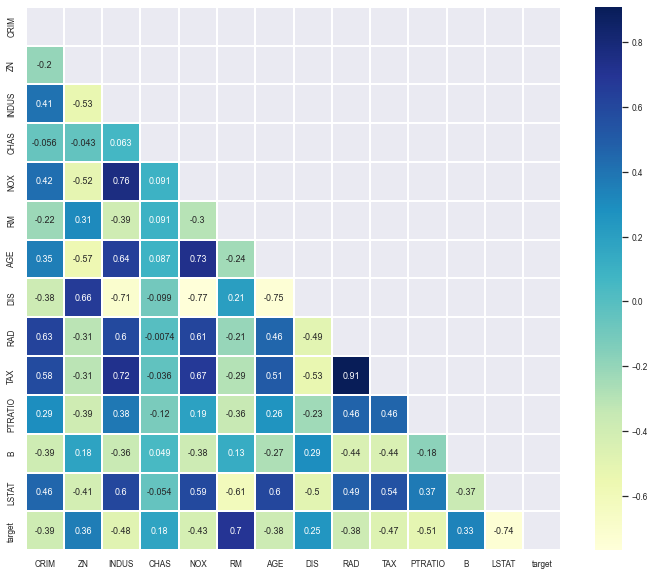

In [25]:
#Adenda 5: para corroborar los resultados presentados a continuacion
#           hacemos los graficos de la matriz de corrlacion con haetmap-.
if True: # @ comentado 30052022 --FIG_6--
    corr = df.corr(method='pearson')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    corr= corr.mask(mask)
    figure, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr,
                ax=ax,
                cmap="YlGnBu",
                linewidths=0.1,
                annot=True
                )

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

**3-1 Seleccione un solo atributo que considere puede ser el mas apropiado**

In [26]:
# DSs to create a model-.
atrib= df.loc[:,['RM']]; target= df.target
# atrib= atrib.reshape(-1,1)

# split the DS in trainng and test 
X_train , X_test , y_train, y_test = train_test_split(atrib,
                                                      target,
                                                      test_size=0.8,
                                                      random_state=0
                                                      )


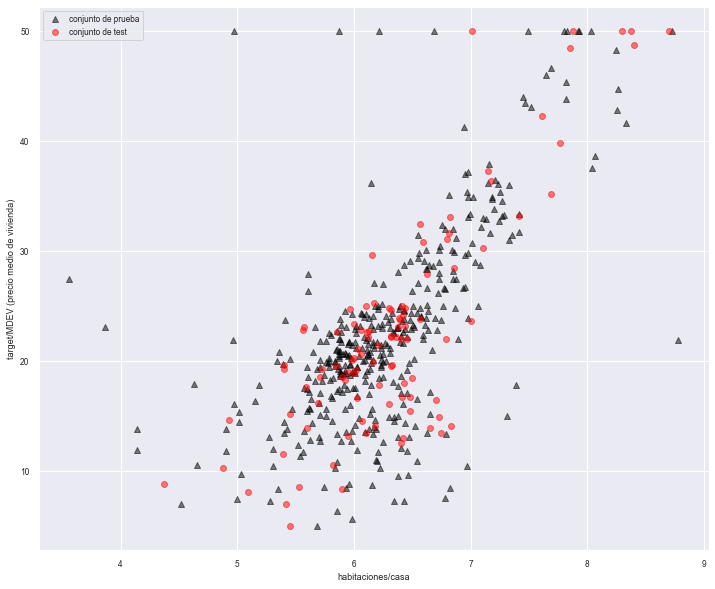

In [27]:
# visualizamos los conjuntos de puntos de entrenamiento y
# validacion/test-.
if True:  # --FIG_7-- 
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de prueba'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= y_train,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de test'
                    )
    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa')
    plt.ylabel('target/MDEV (precio medio de vivienda)')


**3.2 Instancie una regresión lineal de scikit-learn, y entrénela usando sólo el atributo seleccionado.**

In [28]:
# RL-.
# create and training the model-.
# modelo ==> instancia de la clase LinearRegression-.
#model= LinearRegression()
model= LinearRegression()

In [29]:
# vemos si estan definidos los coeficientes del modelo de RLsimple-.
# print(model.coef_) # error: the coef_ are created when fit method is called-.

# entrenamos el modelo
model.fit(X_train, y_train)
# print(model.coef_)
# print(model.intercept_)

LinearRegression()

**3.3 Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.**

In [30]:
# generamos predicciones (con el conjunto de validacion/test)-.
model_test = model.predict(X_test)

In [31]:
# calculamos los errores de la prediccion (val_esperado - val_predicho)-.
def calc_errors(yval:float, yaprox :float):
    r2 = r2_score(yval, yaprox)
    mse= mean_squared_error(yval, yaprox)
    mae= mean_absolute_error(yval, yaprox)
    mevs= explained_variance_score(yval, yaprox)
    return r2, mse, mae, mevs

In [32]:
# puntaje de regresion de la varianza explicada. best == 1.0, worse == 0-.
r2, mse, mae, mevs= calc_errors(y_test, model_test)

print('{0:<40}{1:>5.2f}'.
      format('R2', r2)
      )
print('{0:<40}{1:>5.2f}{2:>3}'.  
      format('Error medio cuadratico (MSE)=', mse, '%')
      )
print('{0:<40}{1:>5.2f}{2:>3}'.  
      format('Error medio absoluto (MAE)=', mae, '%')
      )
print('{0:<40}{1:>5.2f}{2:>3}'.  
      format('Puntaje de regresion de la varianza explicada=',
             mevs, '%'
             )
      )

R2                                       0.38
Error medio cuadratico (MSE)=           49.03  %
Error medio absoluto (MAE)=              4.57  %
Puntaje de regresion de la varianza explicada= 0.39  %


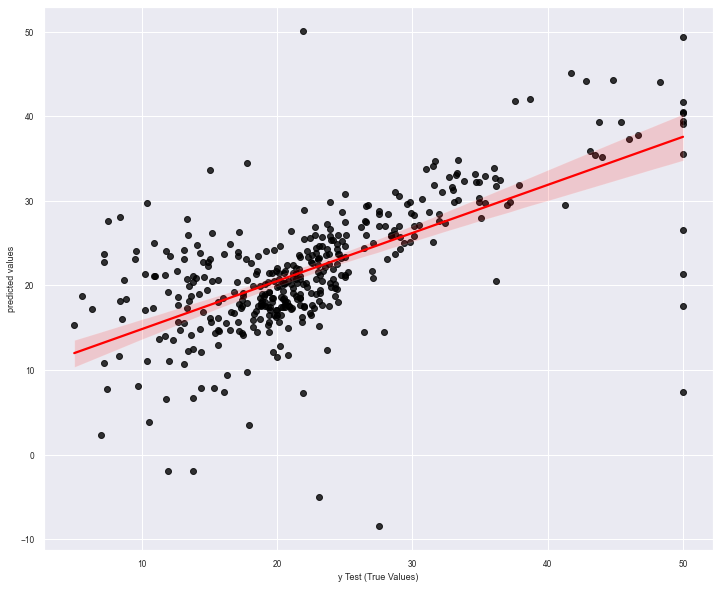

In [33]:
if True:   # --FIG_8-- 
    # fig= plt.figure(figsize=(14,11))
    figure, ax = plt.subplots(figsize=(12, 10))
    # sns.set(rc={'figure.figsize':(10,8)})
    # sns.scatter(y_test,model_test)
    sns.regplot(data= df,
                x= y_test,
                y= model_test,
                fit_reg= True,
                scatter_kws={"color": "black"},
                line_kws={"color": "red"},
                ax= ax
                )
    plt.xlabel('y Test (True Values)')
    plt.ylabel('predicted values')


<Figure size 1008x792 with 0 Axes>

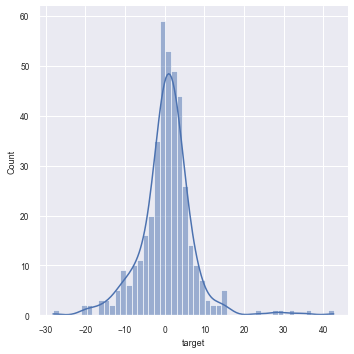

In [34]:
if True:   # --FIG_9-- 
    # distribucion-.
    fig= plt.figure(figsize=(14,11))
    sns.displot(y_test-model_test,
                bins=50,
                kde=True
                )

**3.4 - Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluacion-.**

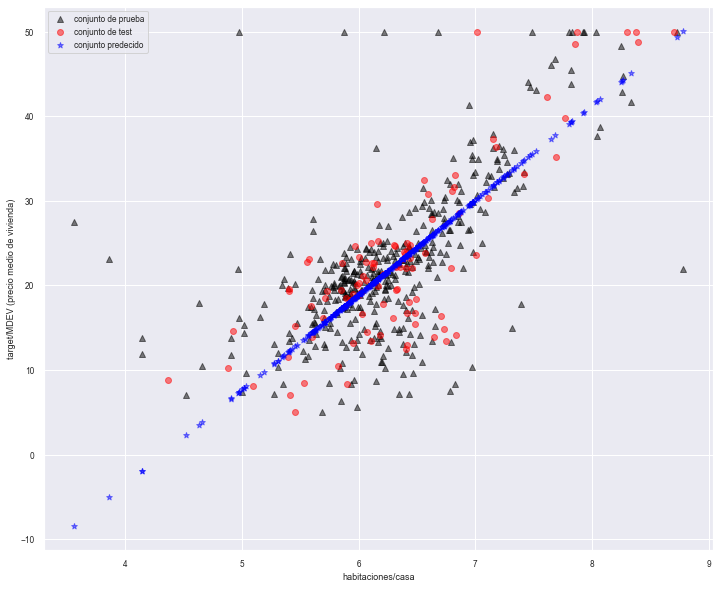

In [35]:

if True: #   # --FIG_10-- 
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de prueba'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= y_train,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de test'
                    )
    ax= plt.scatter(x= X_test.RM,
                    y= model_test,
                    marker='*',
                    color='blue',
                    alpha=0.5,
                    label='conjunto predecido'
                    )
    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa')
    plt.ylabel('target/MDEV (precio medio de vivienda)')

<Figure size 1008x792 with 0 Axes>

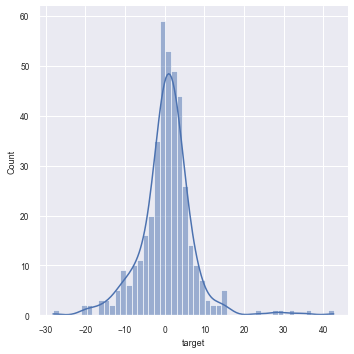

In [36]:
if True: # --FIG_11-- 
    fig= plt.figure(figsize=(14,11))
    sns.displot(y_test-model_test,
                bins=50,
                kde=True
                )

**3.5 Interprete el resultado, haciendo algun comentario sobre  las cualidades del modelo obtenido.**

In [37]:
# a completar

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

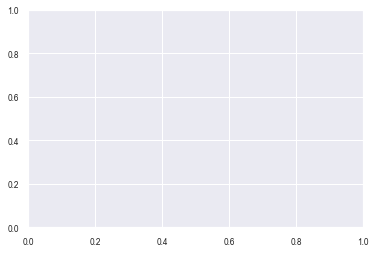

In [42]:
# extracted from
#https://scikit-learn.org/stable/auto_examples/linear_model/
#       plot_polynomial_interpolation.html
# to store train and test errors-.
train_errors = []
val_errors = []
if True: # --FIG_12-- 
    fig, ax = plt.subplots()
    ax.set_prop_cycle(color=["black",    # incompleto (tbc in f(poliegrees)
                             "teal",
                             "yellowgreen",
                             "gold",
                             "darkorange",
                             "tomato"
                             ]
                      )

In [38]:
# 1. Resolver acá.

In [43]:
# 4-1-A- Instancie y entrene una regresion polinomial.
# grados de los polinomios empleados en la RPol-.
# 4-1-B- Prediga y calcule error en entrenamiento y evaluacion.
#        Imprima los valores.
# 4-1-C- Guarde los errores en una lista.
pol_degree= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in pol_degree:
    # entrenamiento-.
    pf= PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)

In [45]:
# predicciones-.
y_train_pred= model.predict(X_train)
y_test_pred= model.predict(X_test)

In [46]:
# store errors-.
#train_errors.append(mean_squared_error(y_train, y_train_pred)
#                    )
#val_errors.append(mean_squared_error(y_test, y_test_pred)
#                  )
r2, mse, mae, mevs= calc_errors(y_train, y_train_pred)
val_to_add= [r2, mse, mae, mevs]
train_errors= train_errors + val_to_add
r2, mse, mae, mevs= calc_errors(y_test, y_test_pred)
val_to_add= [r2, mse, mae, mevs]
val_errors= val_errors + val_to_add

In [49]:
# grafico-.
if True: # --FIG_13 and others-- 
    ax.scatter(X_test.RM,
               y_test_pred,
               label=f'grado{degree}',
               alpha=0.5
               )
    ax.grid(True)            
    
if True: # --FIG_13 and others-- 
    ax.scatter(X_train, y_train, color="blue", label="train")
    ax.legend(loc="upper left")

In [50]:
# imprimo los valores de los errores (mse==> error medio cuadratic)
print('{0}{1}{2}'.format('2\n', '\3\t', 'ERRORES DE ENTRENAMIENTO'))
print('{0:<10}{1}{2}'.
      format('R2', ':', list(np.around(np.array(
          train_errors[0:len(train_errors):4]),2)))) # r2
print('{0:<10}{1}{2}'.
      format('mse', ':', list(np.around(np.array(
          train_errors[1:len(train_errors):4]),2)))) # mse
print('{0:<10}{1}{2}'.
      format('mae', ':', list(np.around(np.array(
          train_errors[2:len(train_errors):4]),2)))) # mae
print('{0:<10}{1}{2}'.
      format('mevs', ':', list(np.around(np.array(
          train_errors[3:len(train_errors):4]),2)))) # mevs
print('{0}{1}{2}'.format('2\n', '\3\t', 'ERRORES DE TEST'))
print('{0:<10}{1}{2}'.
      format('R2', ':', list(np.around(np.array(
          val_errors[0:len(val_errors):4]),2)))) # r2
print('{0:<10}{1}{2}'.
      format('mse', ':', list(np.around(np.array(
          val_errors[1:len(val_errors):4]),2)))) # mse
print('{0:<10}{1}{2}'.
      format('mae', ':', list(np.around(np.array(
          val_errors[2:len(val_errors):4]),2)))) # mae
print('{0:<10}{1}{2}'.
      format('mevs', ':', list(np.around(np.array(
          val_errors[3:len(val_errors):4]),2)))) # mevs

2
	ERRORES DE ENTRENAMIENTO
R2        :[0.73]
mse       :[27.53]
mae       :[4.05]
mevs      :[0.73]
2
	ERRORES DE TEST
R2        :[-206.77]
mse       :[16559.08]
mae       :[12.48]
mevs      :[-205.86]


In [51]:
# 4-2- Grafique las curvas de error en terminos del grado del
#      polinomio.
if True: # @ comentado 30052022  # --FIG_14-- 
    print(len(val_errors))
    target_columns= len(val_errors)/len(pol_degree) # pythonic form-.
    nsfigs= target_columns # number of subfigs-.
    nc= 2
    nr= int(np.ceil(nsfigs/nc))
    # @ gridspec see Arranging multiple Axes in a Figure Matplotlib doc.-.
    gs= gridspec.GridSpec(nr, nc) 
    fig= plt.figure(figsize=(14,11))
    for idx in range(int(nsfigs)):
        # type of errors
        if idx == 0: type_error= 'R2'
        elif idx == 1: type_error= 'mean square error (mse)'
        elif idx == 2: type_error= 'mean_absolute_error (mae)'
        elif idx == 3: type_error= 'explained_variance_score (evs)'
        else:
            print('Error type not contemplated (0-3)')
            exit
        ax= fig.add_subplot(gs[idx])
        ax.plot(pol_degree,
                val_errors[0+idx:len(val_errors):4],
                linestyle='--',
                marker='o',
                color='b',
                label='test_errors'
                )
        ax.plot(pol_degree,
                train_errors[0+idx:len(val_errors):4],
                linestyle=':',
                marker='^',
                color='r',
                label='train_errors'
                )
        plt.title('{0}'.format(type_error))
        ax.legend()
        ax.set_xlabel("degree")
        ax.set_ylabel("error")
        ax.grid(True)


4


<Figure size 1008x792 with 0 Axes>

In [ ]:
# 4-3- Interprete la curva, identificando el punto en que comienza a
#      haber sobreajuste, si lo hay.
'''
Al analizar las curvas se observa que el overfitting comienza a partir del 
grado 8 del polinomio-.
'''

In [ ]:
# 4-4- Seleccione el modelo que mejor funcione, y grafique el modelo
# conjuntamente con los puntos.
'''
Al analizar la evolucion y la diferencia del error medio cuadratico entre
el conjunto de entrenamiento y de validacion/test, se concluye que el mejor 
modelo corresponde a la RPol de grado 3-. 
A continuacion se grafican el modelo con el conjunto de datos de DS-. 
'''

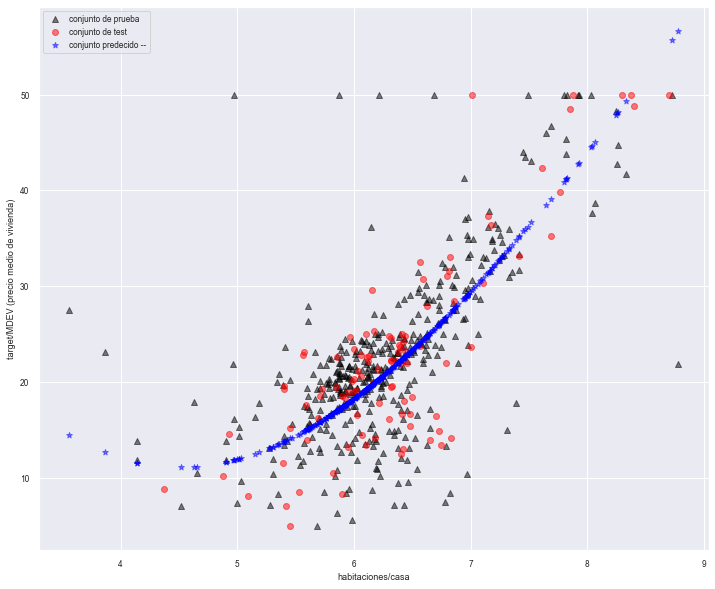

In [52]:
# 3-4 - Grafique el modelo resultante, junto con los puntos de
#       entrenamiento y evaluacion-.

pol_degree_best= 3
# entrenamiento-.
pf= PolynomialFeatures(degree=pol_degree_best)
lr = LinearRegression()
model = make_pipeline(pf, lr)
model.fit(X_train, y_train)
# predicciones-.
y_test_pred= model.predict(X_test)
# graficamos-.
if True: # --FIG_15-- 
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de prueba'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= y_train,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de test'
                    )
    ax= plt.scatter(x= X_test.RM,
                    y= y_test_pred,
                    marker='*',
                    color='blue',
                    alpha=0.5,
                    label='conjunto predecido --'
                    )

    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa')
    plt.ylabel('target/MDEV (precio medio de vivienda)')

In [ ]:
# 4-5- Interprete el resultado, haciendo algun comentario sobre las
#      cualidades del modelo obtenido.
'''
Impecable ja ja ja ja !!!-. (tbc) to be completed !!!!
'''


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 2. Resolver acá.

In [53]:
'''
Segun los analisis realizados (Punto 2-3), se seleccionaran las 
variables/atributos:
1- RM-.
2- CRIM-.
3- TAX-.
para desarrollar este punto-.
'''

'\nSegun los analisis realizados (Punto 2-3), se seleccionaran las \nvariables/atributos:\n1- RM-.\n2- CRIM-.\n3- TAX-.\npara desarrollar este punto-.\n'

In [54]:
# hago otra aproximacion para (not used here)-.
vars_to_delete = ['ZN', 'INDUS', 'CHAS', 'NOX',
                  'AGE', 'DIS', 'TAX', 'PTRATIO',
                  'B', 'LSTAT']
df_multicol= df.drop(vars_to_delete, axis=1) # (not used here)-.
# print(df_multicol.head)


In [55]:
# DSs to create a model-.
# atrib= df.loc[:,['RM', 'CRIM', 'RAD']]; target= df.target
atrib= df[['RM', 'CRIM', 'TAX']]; target= df.target

In [56]:
# split the DS in trainng and test 
X_train , X_test , y_train, y_test = train_test_split(atrib,
                                                      target,
                                                      test_size=0.6,
                                                      random_state=0 # seed
                                                      )
train_errors = [] # list to save training errors in function of polynomial degree-.
val_errors = [] # list to save tests errors in function of polynomial degree-.

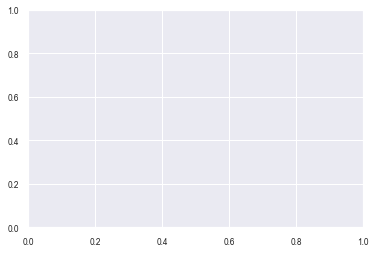

In [57]:
if True: # --FIG_16-- 
    fig, ax = plt.subplots()
    ax.set_prop_cycle(color=["teal",        # incompleto (tbc in f(poliegrees)
                             "black",
                             "yellowgreen",
                             "gold",
                             "darkorange",
                             "tomato"
                             ]
                      )

In [58]:
# 5-1-A- Instancie y entrene una regresion polinomial.
# grados de los polinomios empleados en la RPol-.
# 5-1-B- Prediga y calcule error en entrenamiento y evaluacion.
#        Imprima los valores.
# 5-1-C- Guarde los errores en una lista.
pol_degree= [1,2,3,4,5,6,7,8,9,10]
#pol_degree= [3]
for degree in pol_degree:
    # entrenamiento-.
    pf= PolynomialFeatures(degree=degree, include_bias=True)
    
    X_train_poly = pf.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    # predicting on training data-set-.
    y_train_pred= lr.predict(X_train_poly)
    
    # predicting on test data-set-.
    y_test_pred= lr.predict(pf.fit_transform(X_test))
    
    # store errors-.
    r2, mse, mae, mevs= calc_errors(y_train, y_train_pred)
    val_to_add= [r2, mse, mae, mevs]
    train_errors= train_errors + val_to_add
    r2, mse, mae, mevs= calc_errors(y_test, y_test_pred)
    val_to_add= [r2, mse, mae, mevs]
    val_errors= val_errors + val_to_add
    

In [60]:
# grafico-.
if True: # --FIG_17--
    ax.scatter(X_test.RM,
               y_test_pred,
               label=f'grado{degree}',
               alpha=0.5
               )
    ax.grid(True)
    # ax.scatter(X_train.RM, y_train, color="blue", label="train")
    ax.legend(loc="upper left")

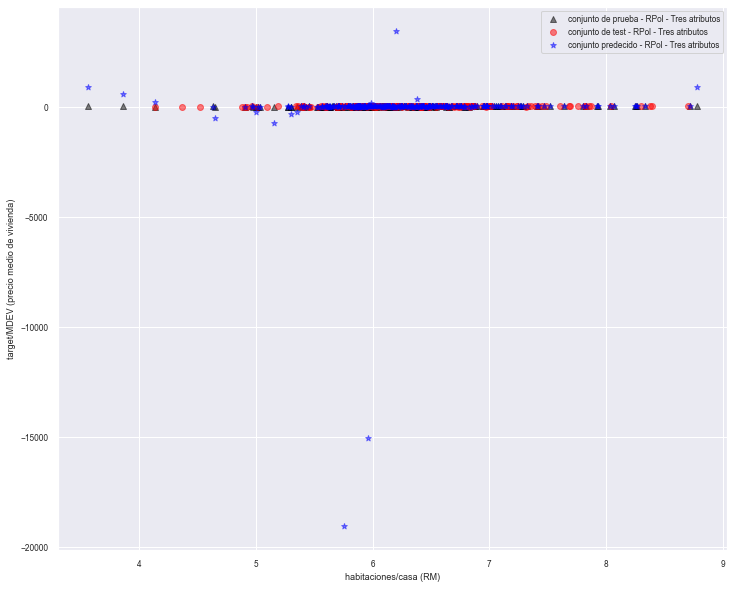

In [61]:
# (viene de 3-4) - Grafique el modelo resultante, junto con los puntos de
# entrenamiento y evaluacion-.
if True: # --FIG_18--
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de prueba - RPol - Tres atributos'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= y_train,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de test - RPol - Tres atributos'
                    )
    ax= plt.scatter(x= X_test.RM,
                    y= y_test_pred,
                    marker='*',
                    color='blue',
                    alpha=0.5,
                    label='conjunto predecido - RPol - Tres atributos'
                )
    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa (RM)')
    plt.ylabel('target/MDEV (precio medio de vivienda)')
    

In [62]:
# imprimo los valores de los errores (mse==> error medio cuadratic)
print('{0}{1}{2}'.format('2\n', '\3\t',
                         'ERRORES DE ENTRENAMIENTO  - RPol - Tres atributos') 
      )
print('{0:<10}{1}{2}'.
      format('R2', ':', list(np.around(np.array(
          train_errors[0:len(train_errors):4]),2)))) # r2
print('{0:<10}{1}{2}'.
      format('mse', ':', list(np.around(np.array(
          train_errors[1:len(train_errors):4]),2)))) # mse
print('{0:<10}{1}{2}'.
      format('mae', ':', list(np.around(np.array(
          train_errors[2:len(train_errors):4]),2)))) # mae
print('{0:<10}{1}{2}'.
      format('mevs', ':', list(np.around(np.array(
          train_errors[3:len(train_errors):4]),2)))) # mevs
print('{0}{1}{2}'.format('2\n', '\3\t',
                         'ERRORES DE TEST - RPol - Tres atributos')
      )
print('{0:<10}{1}{2}'.
      format('R2', ':', list(np.around(np.array(
          val_errors[0:len(val_errors):4]),2)))) # r2
print('{0:<10}{1}{2}'.
      format('mse', ':', list(np.around(np.array(
          val_errors[1:len(val_errors):4]),2)))) # mse
print('{0:<10}{1}{2}'.
      format('mae', ':', list(np.around(np.array(
          val_errors[2:len(val_errors):4]),2)))) # mae
print('{0:<10}{1}{2}'.
      format('mevs', ':', list(np.around(np.array(
          val_errors[3:len(val_errors):4]),2)))) # mevs

2
	ERRORES DE ENTRENAMIENTO  - RPol - Tres atributos
R2        :[0.62, 0.72, 0.74, 0.78, 0.81, 0.84, 0.83, 0.79, 0.7, 0.83]
mse       :[36.36, 26.9, 24.63, 21.42, 18.19, 15.47, 16.27, 20.31, 28.42, 16.48]
mae       :[3.98, 3.23, 3.24, 3.26, 3.01, 2.81, 2.94, 3.26, 3.82, 2.95]
mevs      :[0.62, 0.72, 0.74, 0.78, 0.81, 0.84, 0.83, 0.79, 0.7, 0.83]
2
	ERRORES DE TEST - RPol - Tres atributos
R2        :[0.52, 0.65, 0.64, -1.33, -0.78, -18.76, -1339.5, -7863.53, -30277.49, -25933.65]
mse       :[36.49, 26.81, 27.68, 178.17, 136.41, 1511.51, 102545.51, 601620.92, 2316244.32, 1983949.6]
mae       :[4.0, 3.33, 3.33, 5.22, 5.15, 7.55, 28.63, 76.33, 147.22, 144.35]
mevs      :[0.52, 0.65, 0.64, -1.32, -0.77, -18.76, -1332.69, -7816.0, -30104.61, -25807.19]


40


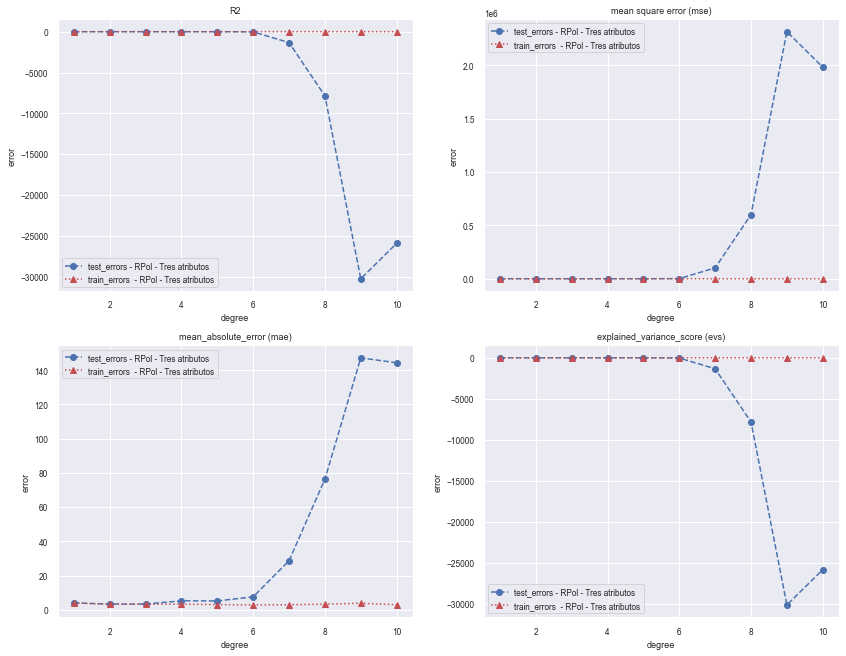

In [63]:
# (viene de 4-2-) Grafique las curvas de error en terminos del grado del
#                 polinomio-.
if True: # @ comentado 30052022 # --FIG_19--
    print(len(val_errors))
    target_columns= len(val_errors)/len(pol_degree) # pythonic form-.
    nsfigs= target_columns # number of subfigs-.
    nc= 2
    nr= int(np.ceil(nsfigs/nc))
    # @ gridspec see Arranging multiple Axes in a Figure Matplotlib doc.-.
    gs= gridspec.GridSpec(nr, nc) 
    fig= plt.figure(figsize=(14,11))
    for idx in range(int(nsfigs)):
        # type of errors
        if idx == 0: type_error= 'R2'
        elif idx == 1: type_error= 'mean square error (mse)'
        elif idx == 2: type_error= 'mean_absolute_error (mae)'
        elif idx == 3: type_error= 'explained_variance_score (evs)'
        else:
            print('Error type not contemplated (0-3)')
            exit
        ax= fig.add_subplot(gs[idx])
        ax.plot(pol_degree,
                val_errors[0+idx:len(val_errors):4],
                linestyle='--',
                marker='o',
                color='b',
                label='test_errors - RPol - Tres atributos'
                )
        ax.plot(pol_degree,
                train_errors[0+idx:len(val_errors):4],
                linestyle=':',
                marker='^',
                color='r',
                label='train_errors  - RPol - Tres atributos'
                )
        plt.title('{0}'.format(type_error))
        ax.legend()
        ax.set_xlabel("degree")
        ax.set_ylabel("error")
        ax.grid(True)


# Repita el ejercicio anterior, pero usando los atributos seleccionados.
# No hace falta graficar el modelo final.

# Interprete el resultado y compare con los ejercicios anteriores.
# ¿Se obtuvieron mejores modelos?. ¿Porque?

In [64]:
plt.show()

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
